<a href="https://colab.research.google.com/github/joungminhee/project/blob/master/Movie_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 임포트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙에서 한글 깨짐 현상 있을때 설치 후 밑코드로 해결완료
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비

In [ ]:
data = '/content/drive/MyDrive/Data/movies_train.csv'
data2 = '/content/drive/MyDrive/Data/movies_test.csv'
data3 = '/content/drive/MyDrive/Data/submission.csv'

In [ ]:
train = pd.read_csv(data)
test = pd.read_csv(data2)
data3 = pd.read_csv(data3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train.shape, test.shape

((600, 12), (243, 11))

In [ ]:
# object의 기술통계량
train.describe(include='object')

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# 데이터 탐색

In [ ]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [ ]:
# 각 배급별 제작횟수
train.distributor.value_counts().head()

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

In [ ]:
train.distributor.unique()
# 많아서 전처리 때 컬럼 삭제할 예정

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [ ]:
# 상위 10위의 관람객수
top10 = train.sort_values('box_off_num', ascending=False).head(10)
top10

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,NaN,0,67,10,9350351
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1.242778e+06,2,298,6,9135806
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725


In [ ]:
# 상위 10개의 배급별 제작횟수
top10.distributor.value_counts()

CJ 엔터테인먼트    4
(주)쇼박스       3
(주)NEW       2
롯데엔터테인먼트     1
Name: distributor, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

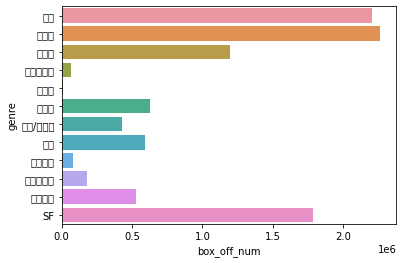

In [ ]:
# 장르별 관람객 수 
sns.barplot(data=train, y='genre', x='box_off_num', ci=None)
plt.show()

In [ ]:
# 감독별로 제작한 횟수
train.director.value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [ ]:
# 장르별 제작횟수
train.genre.value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
# 각 관람가연령별 장르별 갯수
train.groupby('screening_rat')['genre'].value_counts()

screening_rat  genre 
12세 관람가        드라마       50
               다큐멘터리     23
               멜로/로맨스    10
               코미디       10
               SF         3
               애니메이션      3
               공포         1
               뮤지컬        1
               액션         1
15세 관람가        드라마       76
               코미디       28
               멜로/로맨스    21
               공포        19
               다큐멘터리     17
               액션        16
               느와르        9
               미스터리       9
               SF         6
               애니메이션      1
전체 관람가         다큐멘터리     52
               드라마       17
               애니메이션     14
               뮤지컬        4
               코미디        3
               SF         1
               멜로/로맨스     1
청소년 관람불가       드라마       78
               멜로/로맨스    46
               공포        22
               느와르       18
               코미디       12
               액션        11
               미스터리       8
               SF         3
               애니메이션      

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_

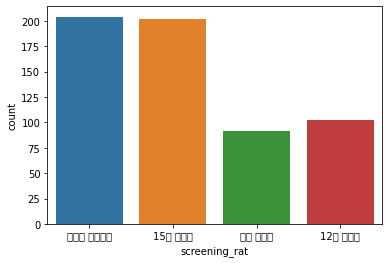

In [ ]:
sns.countplot(x='screening_rat', data=train)
plt.show()

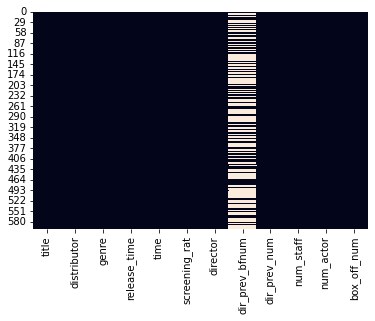

In [ ]:
sns.heatmap(train.isnull(), cbar=False)
plt.show()

# 지영님이 알려주신 Null 시각화 히트맵 적용해봄 :)

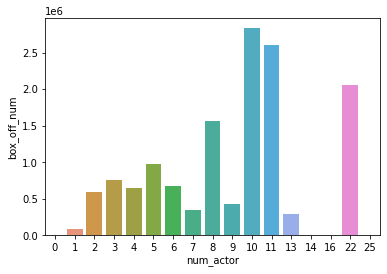

In [ ]:
# 영화배우별수와 관람객 수 
sns.barplot(x='num_actor' , y='box_off_num', data=train, ci=None)
plt.show()

In [ ]:
# time 구간화 위해 기술통계량 확인
train.time.describe()

count    600.000000
mean     100.863333
std       18.097528
min       45.000000
25%       89.000000
50%      100.000000
75%      114.000000
max      180.000000
Name: time, dtype: float64

In [ ]:
train.dir_prev_bfnum.mean()

1050442.8914197532

# 데이터 전처리

## 결측치 대체

In [ ]:
train.dir_prev_bfnum.fillna(0).mean()

472699.30113888887

In [ ]:
train.dir_prev_bfnum.mean()

1050442.8914197532

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

## time 구간화

In [ ]:
#time 구간화 위해, 파생변수 생성
bins = [45,90,120,185]
labels = ['1.5h','2h미만','2h이상']

train['time'] = pd.cut(train.time, bins, labels=labels, right=False)
test['time']= pd.cut(test.time, bins, labels=labels, right=False)
# right=False 로 지정시 우측 범위를 포함하지 않는다.
# 현정님이 알려주신 time 구간화 적용해봄 :) 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           600 non-null    object  
 1   distributor     600 non-null    object  
 2   genre           600 non-null    object  
 3   release_time    600 non-null    object  
 4   time            600 non-null    category
 5   screening_rat   600 non-null    object  
 6   director        600 non-null    object  
 7   dir_prev_bfnum  600 non-null    float64 
 8   dir_prev_num    600 non-null    int64   
 9   num_staff       600 non-null    int64   
 10  num_actor       600 non-null    int64   
 11  box_off_num     600 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(6)
memory usage: 52.4+ KB


In [ ]:
train[train['time'].isnull()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [ ]:
train = pd.get_dummies(train, columns=['time'])
test = pd.get_dummies(test, columns=['time'])

In [ ]:
train.shape, test.shape

((600, 14), (243, 13))

In [ ]:
# 종속변수 생성
box_num = train.pop('box_off_num')

In [ ]:
train.shape, test.shape

((600, 13), (243, 13))

# 카테고리 더미화

In [ ]:
# distributor 배급사 상위 5개 제외 모두 기타로 처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
# 장르별 라벨인코딩
from sklearn.preprocessing import LabelEncoder
cols = ['genre','screening_rat','distributor']
for col in cols:
    le = LabelEncoder() #모델생성
    train[col] = le.fit_transform(train[col])
    test[col]= le.transform(test[col])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    int64  
 2   genre           600 non-null    int64  
 3   release_time    600 non-null    object 
 4   screening_rat   600 non-null    int64  
 5   director        600 non-null    object 
 6   dir_prev_bfnum  600 non-null    float64
 7   dir_prev_num    600 non-null    int64  
 8   num_staff       600 non-null    int64  
 9   num_actor       600 non-null    int64  
 10  time_1.5h       600 non-null    uint8  
 11  time_2h미만       600 non-null    uint8  
 12  time_2h이상       600 non-null    uint8  
dtypes: float64(1), int64(6), object(3), uint8(3)
memory usage: 48.8+ KB


In [ ]:
train.shape, test.shape

((600, 13), (243, 13))

## 필요없는 컬럼 제거

In [ ]:
# 필요없는 columns 제거
train = train.drop(columns=['title','director'])
test = test.drop(columns=['title','director'])

In [ ]:
train.shape, test.shape

((600, 11), (243, 11))

In [ ]:
train.head()

,distributor,genre,release_time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,time_1.5h,time_2h미만,time_2h이상
0,5,10,2012-11-22,3,0.00,0,91,2,0,1,0
1,2,2,2015-11-19,3,1161602.50,2,387,3,0,0,1
2,2,10,2013-06-05,1,220775.25,4,343,4,0,0,1
3,0,11,2012-07-12,2,23894.00,2,20,6,0,1,0
4,4,11,2010-11-04,1,1.00,1,251,2,0,1,0


## 파생변수 생성

In [ ]:
# datetime으로 type변경
train['release_time'] = pd.to_datetime(train['release_time'])

In [ ]:
# to_datetime 바꾸기
train['year'] = train['release_time'].dt.year
train['mon'] = train['release_time'].dt.month
train['day'] = train['release_time'].dt.day
# Can only use .dt accessor with datetimelike values
# type을 datetime으로 변경 후 dt.year 코드 적용이 되는걸 알 수 있음.

In [ ]:
train.info()
# year 파생변수와 release_time이 datetime으로 바뀐 것을 알 수 있음.
# 필요없는 release_time 지우기 - > 나중에 모델훈련때 오류 가능성 제외하기 위해서
train = train.drop(columns='release_time')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   distributor     600 non-null    int64         
 1   genre           600 non-null    int64         
 2   release_time    600 non-null    datetime64[ns]
 3   screening_rat   600 non-null    int64         
 4   dir_prev_bfnum  600 non-null    float64       
 5   dir_prev_num    600 non-null    int64         
 6   num_staff       600 non-null    int64         
 7   num_actor       600 non-null    int64         
 8   time_1.5h       600 non-null    uint8         
 9   time_2h미만       600 non-null    uint8         
 10  time_2h이상       600 non-null    uint8         
 11  year            600 non-null    int64         
 12  mon             600 non-null    int64         
 13  day             600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9), uint8(3)
memor

In [ ]:
train.shape, test.shape

((600, 13), (243, 11))

In [ ]:
# 테스트 컬럼과 트레인 컬럼의 갯수를 맞추기 위해 to_datetime을 test에도 적용시킴

test['release_time'] = pd.to_datetime(test['release_time'])
test['year'] = test['release_time'].dt.year
test['mon'] = test['release_time'].dt.month
test['day'] = test['release_time'].dt.day
test = test.drop(columns='release_time')

In [ ]:
train.shape , test.shape

((600, 13), (243, 13))

In [ ]:
train.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,time_1.5h,time_2h미만,time_2h이상,year,mon,day
0,5,10,3,0.00,0,91,2,0,1,0,2012,11,22
1,2,2,3,1161602.50,2,387,3,0,0,1,2015,11,19
2,2,10,1,220775.25,4,343,4,0,0,1,2013,6,5
3,0,11,2,23894.00,2,20,6,0,1,0,2012,7,12
4,4,11,1,1.00,1,251,2,0,1,0,2010,11,4


# 데이터 모델링

In [ ]:
# import sklearn.metrics
# print(help(sklearn.metrics.f1_score))
# 함수가 생각안난다면 이런식으로 찾아서 사용가능!

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , f1_score , mean_squared_error
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
X = train.values.copy()
y = box_num.values.copy()

In [ ]:
y[:3]
# 1차원 배열인지 확인하기 위해서

array([  23398, 7072501, 6959083])

In [ ]:
X_tr, X_te, y_tr, y_te =train_test_split(X,y,
                                         test_size=0.3,
                                         random_state=42)

* 랜덤포레스트

In [ ]:
model = Pipeline([('scaler', StandardScaler() ),
                 ('reg', RandomForestRegressor(max_depth=5,n_jobs=-1, n_estimators=1000,
                                               max_samples=30,random_state=42))])

In [ ]:
model.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 RandomForestRegressor(max_depth=5, max_samples=30,
                                       n_estimators=1000, n_jobs=-1,
                                       random_state=42))])

In [ ]:
model.score(X_tr,y_tr)

0.4240501168248254

In [ ]:
model.score(X_te,y_te)

0.28329958228784324

In [ ]:
te_pred = model.predict(X_te)

In [ ]:
# Rmse
print(f' RMSE score :', np.sqrt(mean_squared_error(y_te,te_pred)))

 RMSE score : 1062330.198716851


* XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
x_model = Pipeline([('scaler', StandardScaler() ),
                  ('reg', xgb.XGBRegressor(colsample_bytree = 0.4, n_jobs=-1,
                    max_depth = 4, alpha = 6, n_estimators =10))])

In [ ]:
x_model.fit(X_tr, y_tr)

[03:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 XGBRegressor(alpha=6, colsample_bytree=0.4, max_depth=4,
                              n_estimators=10, n_jobs=-1))])

In [ ]:
x_model.score(X_te,y_te)

0.4183610090758385

In [ ]:
te_pred = x_model.predict(X_te)

In [ ]:
# Rmse
print(f' RMSE score :', np.sqrt(mean_squared_error(y_te,te_pred)))

 RMSE score : 957012.1569152931


# 예측

In [ ]:
# 테스트 셋에 예측해보기
pred = x_model.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
data3.box_off_num = pred

In [ ]:
data3.head()

,title,box_off_num
0,용서는 없다,5.824110e+05
1,아빠가 여자를 좋아해,9.931151e+05
2,하모니,1.537193e+06
3,의형제,1.315296e+06
4,평행 이론,8.324809e+05


In [ ]:
data3.to_csv('submission6.csv',index=False)

# 스터디 06/26

* 데이터 탐색(EDA) 컬럼과 종속변수 관계를 꼼꼼하게 해서 분석하자

* `plt.rc('font', size=12)`
=> 전체 폰트 사이즈 크기를 키워주는 것

* `resample('Y')`
=> 연도별로 인덱스를 잡기

* GridSerachCV를 할 때 파라미터를 너무 많이 넣으면 로딩이 튕긴다.

* describe()를 할 때 평균에 비해 표준편차가 크다는 것은 분산이 크다는 것을 알 수 있다.
$$
STD = \sqrt{ Var }
$$
 * 분산은 편차에 제곱을 하여 계산을 하였고, 실제  값에서 너무 멀어져 있다. 그래서 실제 값으로 근접 시키기 위해서 제곱근(루트)를 씌워준 것이다. (분산에서 제곱했으니, 반대로 제곱근을 씌운다.)
즉 분산에 루트를 씌운것이 표준 편차(Standard deviation) 

* `cate_list = ['time',   'dir_prev_bfnum',   'dir_prev_num',   'num_staff'   ,'num_actor'   ,'box_off_num']`

* `fig, ax = plt.subplots(2,3 , figsize = (20,16))`

* `for idx, val in enumerate(cate_list):
    i = idx // 3
    j = idx % 3
    sns.histplot(data= train, x = val, ax=ax[i,j])`
 
 `plt.show()`


* `dt.strftime(%Y-%M-%d)`
datetime -> 문자열로 바꾸기

* train의 행을 확인 후 인덱스만 따로 빼놓고,
concat으로 train,test 합치고 전처리 한번에 하기
-> 중간의 결측치 행 제거를 해도 행으로 빠지기 때문에
train의 행을 ex) [0,600) 해도 인덱스 자체로는 문제없음! (펭귄작업할때 써보기!!)

#스터디 07/03

* `np.log1p` : 정규화하는 방법중의 하나 -로짓변환

* `import cmath` : 마이너스(-)를 제곱근한 것

* `prefix = 'distri'` : 앞에 'distri' 이름을 붙이겠다

* Train 기준으로 맞추다보니 test에 이상한 데이터 발견
Test 데이터도 늘 확인해보기 

*  모델링 `import lightgbm as lgb`

 * `LGBMRegressor (boosting_type ='dart'` :
정확도를 사용할 때 쓰는 'dart'

 * `xgb = XGBRegressor (booster = 'dart'`

* xgb에는 booster, lgbm은 boosting_type


* `pd.options.display.float_format = '{:.1f}'.format` :숫자의 제곱을 그냥 숫자 그대로 보여주는것 ex)2.343985e+4
, 이런것들을 숫자 그대로 쭉 보여주는것
